In [11]:
%matplotlib notebook

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

In [13]:
housing_df = pd.read_csv("Resources/DC_Properties.csv")

In [14]:
housing_df2 = housing_df.drop(["Unnamed: 0", "BLDG_NUM", "NATIONALGRID", "X", "Y"], axis=1)
housing_df2.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,ZIPCODE,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,QUADRANT
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,...,20009.0,38.914680,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW
1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,...,20009.0,38.914683,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW
2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,...,20009.0,38.914684,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW
3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,...,20009.0,38.914683,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW
4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,...,20009.0,38.914383,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW


In [15]:
housing_df2['YEAR'] = pd.DatetimeIndex(housing_df2['SALEDATE']).year
housing_df2['MONTH'] = pd.DatetimeIndex(housing_df2['SALEDATE']).month
housing_df2.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,QUADRANT,YEAR,MONTH
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,2003.0,11.0
1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,2000.0,8.0
2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,2016.0,6.0
3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,2006.0,7.0
4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,NaN,NaN


In [16]:
housing_df2 = housing_df2[housing_df2.PRICE.notnull()]
residential_df = housing_df2.loc[housing_df2["SOURCE"] == "Residential"]
residential_df.count().head()

BATHRM       57900
HF_BATHRM    57900
HEAT         57900
AC           57900
NUM_UNITS    57900
dtype: int64

In [17]:
housing_df3 = residential_df[['BATHRM','WARD','QUADRANT','BEDRM','HF_BATHRM','YEAR','PRICE']]
housing_df3 = housing_df3[housing_df3.YEAR.notnull()]
housing_df3 = housing_df3[~(housing_df3['YEAR'] < 1992.0)] 
housing_df3 = housing_df3[~(housing_df3['YEAR'] > 2017.0)]
housing_df3.head(20)

,BATHRM,WARD,QUADRANT,BEDRM,HF_BATHRM,YEAR,PRICE
0,4,Ward 2,NW,4,0,2003.0,1095000.0
2,3,Ward 2,NW,5,1,2016.0,2100000.0
3,3,Ward 2,NW,5,1,2006.0,1602000.0
5,3,Ward 2,NW,5,2,2010.0,1950000.0
7,3,Ward 2,NW,4,1,2011.0,1050000.0
14,3,Ward 2,NW,3,1,2011.0,1325000.0
16,3,Ward 2,NW,3,1,2010.0,1240000.0
19,3,Ward 2,NW,3,1,2001.0,592250.0
20,3,Ward 2,NW,5,1,2016.0,33232.0
22,1,Ward 2,NW,3,0,2006.0,907400.0


In [18]:
two_bed_one_bath = housing_df3[housing_df3['BEDRM'] == 2]
two_bed_one_bath_df = two_bed_one_bath[two_bed_one_bath['BATHRM'] == 1]
two_bed_one_bath_df2 = two_bed_one_bath_df[two_bed_one_bath_df['HF_BATHRM'] == 0]
two_bed_one_bath_df2.head()

,BATHRM,WARD,QUADRANT,BEDRM,HF_BATHRM,YEAR,PRICE
261,1,Ward 2,NW,2,0,2007.0,340000.0
267,1,Ward 2,NW,2,0,2002.0,375000.0
269,1,Ward 2,NW,2,0,2005.0,550000.0
271,1,Ward 2,NW,2,0,2008.0,495000.0
274,1,Ward 2,NW,2,0,2003.0,485000.0


In [19]:
two_bed_one_bath_avg = pd.DataFrame(two_bed_one_bath_df2.groupby('YEAR')['PRICE'].mean())
two_bed_one_bath_avg = two_bed_one_bath_avg.rename(columns={'PRICE': '2Bd 1Ba Price'})
two_bed_one_bath_avg

,2Bd 1Ba Price
YEAR,
1992.0,96306.271186
1993.0,86101.612903
1994.0,113180.260000
1995.0,113372.105263
1996.0,89807.159091
1997.0,94117.260870
1998.0,105846.984848
1999.0,108248.037500
2000.0,101743.872000


In [20]:
two_bed = housing_df3[housing_df3['BEDRM'] == 2]
two_bed_df = two_bed[two_bed['BATHRM'] == 2]
two_bed_df2 = two_bed_df[two_bed_df['HF_BATHRM'] == 0]
two_bed_df2.head()

,BATHRM,WARD,QUADRANT,BEDRM,HF_BATHRM,YEAR,PRICE
59,2,Ward 2,NW,2,0,2000.0,216000.0
151,2,Ward 2,NW,2,0,2014.0,1050000.0
184,2,Ward 2,NW,2,0,2012.0,900000.0
273,2,Ward 2,NW,2,0,2005.0,625000.0
308,2,Ward 1,NW,2,0,2014.0,755000.0


In [21]:
two_bed_avg = pd.DataFrame(two_bed_df2.groupby('YEAR')['PRICE'].mean())
two_bed_avg = two_bed_avg.rename(columns={'PRICE': '2Bd 2Ba Price'})
two_bed_avg

,2Bd 2Ba Price
YEAR,
1992.0,367133.333333
1993.0,107670.041667
1994.0,99875.000000
1995.0,103338.000000
1996.0,101644.812500
1997.0,154298.454545
1998.0,137210.466667
1999.0,269973.162791
2000.0,186789.177778


In [22]:
three_bed = housing_df3[housing_df3['BEDRM'] == 3]
three_bed_df = three_bed[three_bed['BATHRM'] == 2]
three_bed_df2 = three_bed_df[three_bed_df['HF_BATHRM'] == 0]
three_bed_df2.head()

,BATHRM,WARD,QUADRANT,BEDRM,HF_BATHRM,YEAR,PRICE
71,2,Ward 2,NW,3,0,2007.0,682500.0
146,2,Ward 2,NW,3,0,2015.0,865000.0
149,2,Ward 2,NW,3,0,2017.0,950000.0
157,2,Ward 1,NW,3,0,2013.0,650000.0
160,2,Ward 1,NW,3,0,2016.0,830000.0


In [23]:
three_bed_avg = pd.DataFrame(three_bed_df2.groupby('YEAR')['PRICE'].mean())
three_bed_avg = three_bed_avg.rename(columns={'PRICE': '3Bd 2Ba Price'})
three_bed_avg

,3Bd 2Ba Price
YEAR,
1992.0,181612.901961
1993.0,171080.018182
1994.0,151464.491228
1995.0,163027.412698
1996.0,158649.181818
1997.0,170991.894737
1998.0,203326.822917
1999.0,182075.539216
2000.0,197924.115385


In [24]:
three_bed_three_bath = housing_df3[housing_df3['BEDRM'] == 3]
three_bed_three_bath_df = three_bed_three_bath[three_bed_three_bath['BATHRM'] == 3]
three_bed_three_bath_df2 = three_bed_three_bath_df[three_bed_three_bath_df['HF_BATHRM'] == 0]
three_bed_three_bath_df2.head()

,BATHRM,WARD,QUADRANT,BEDRM,HF_BATHRM,YEAR,PRICE
27,3,Ward 2,NW,3,0,2005.0,703700.0
140,3,Ward 2,NW,3,0,2010.0,979000.0
205,3,Ward 2,NW,3,0,1998.0,501000.0
224,3,Ward 2,NW,3,0,2007.0,890000.0
369,3,Ward 2,NW,3,0,2017.0,1250000.0


In [25]:
three_bed_three_bath_avg = pd.DataFrame(three_bed_three_bath_df2.groupby('YEAR')['PRICE'].mean())
three_bed_three_bath_avg = three_bed_three_bath_avg.rename(columns={'PRICE': '3Bd 3Ba Price'})
three_bed_three_bath_avg

,3Bd 3Ba Price
YEAR,
1992.0,340285.714286
1993.0,248325.666667
1994.0,256283.333333
1995.0,242577.777778
1996.0,252095.238095
1997.0,249040.333333
1998.0,257323.433333
1999.0,297147.058824
2000.0,247830.741935


In [26]:
four_bed = housing_df3[housing_df3['BEDRM'] == 4]
four_bed_df = four_bed[four_bed['BATHRM'] == 2]
four_bed_df2 = four_bed_df[four_bed_df['HF_BATHRM'] == 0]
four_bed_df2.head()

,BATHRM,WARD,QUADRANT,BEDRM,HF_BATHRM,YEAR,PRICE
92,2,Ward 2,NW,4,0,1995.0,360000.0
98,2,Ward 2,NW,4,0,2005.0,1560000.0
297,2,Ward 1,NW,4,0,2008.0,517000.0
355,2,Ward 2,NW,4,0,2017.0,1600000.0
359,2,Ward 2,NW,4,0,1992.0,290000.0


In [27]:
four_bed_avg = pd.DataFrame(four_bed_df2.groupby('YEAR')['PRICE'].mean())
four_bed_avg = four_bed_avg.rename(columns={'PRICE': '4Bd 2Ba Price'})
four_bed_avg

,4Bd 2Ba Price
YEAR,
1992.0,206017.857143
1993.0,184297.157895
1994.0,174787.878788
1995.0,176583.692308
1996.0,171248.027778
1997.0,181669.307692
1998.0,169033.727273
1999.0,197764.448980
2000.0,220149.887097


In [28]:
four_bed_three_bath = housing_df3[housing_df3['BEDRM'] == 4]
four_bed_three_bath_df = four_bed_three_bath[four_bed_three_bath['BATHRM'] == 3]
four_bed_three_bath_df2 = four_bed_three_bath_df[four_bed_three_bath_df['HF_BATHRM'] == 0]
four_bed_three_bath_df2.head()

,BATHRM,WARD,QUADRANT,BEDRM,HF_BATHRM,YEAR,PRICE
70,3,Ward 2,NW,4,0,2005.0,990000.0
115,3,Ward 2,NW,4,0,2013.0,2150000.0
169,3,Ward 2,NW,4,0,1997.0,350000.0
173,3,Ward 2,NW,4,0,2017.0,2020000.0
423,3,Ward 1,NW,4,0,1994.0,295000.0


In [29]:
four_bed_three_bath_avg = pd.DataFrame(four_bed_three_bath_df2.groupby('YEAR')['PRICE'].mean())
four_bed_three_bath_avg = four_bed_three_bath_avg.rename(columns={'PRICE': '4Bd 3Ba Price'})
four_bed_three_bath_avg

,4Bd 3Ba Price
YEAR,
1992.0,248600.000000
1993.0,233600.000000
1994.0,269250.000000
1995.0,234155.555556
1996.0,335285.714286
1997.0,259744.000000
1998.0,251407.045455
1999.0,328417.030303
2000.0,304911.031250


In [30]:
five_bed_three_bath = housing_df3[housing_df3['BEDRM'] == 5]
five_bed_three_bath_df = five_bed_three_bath[five_bed_three_bath['BATHRM'] == 3]
five_bed_three_bath_df2 = five_bed_three_bath_df[five_bed_three_bath_df['HF_BATHRM'] == 0]
five_bed_three_bath_df2.head()

,BATHRM,WARD,QUADRANT,BEDRM,HF_BATHRM,YEAR,PRICE
194,3,Ward 2,NW,5,0,2016.0,1410000.0
427,3,Ward 1,NW,5,0,2005.0,735000.0
590,3,Ward 2,NW,5,0,2010.0,1055000.0
751,3,Ward 2,NW,5,0,2013.0,1050000.0
777,3,Ward 2,NW,5,0,2015.0,1711000.0


In [31]:
five_bed_three_bath_avg = pd.DataFrame(five_bed_three_bath_df2.groupby('YEAR')['PRICE'].mean())
five_bed_three_bath_avg = five_bed_three_bath_avg.rename(columns={'PRICE': '5Bd 3Ba Price'})
five_bed_three_bath_avg

,5Bd 3Ba Price
YEAR,
1992.0,356200.000000
1993.0,326862.500000
1994.0,273150.000000
1995.0,253142.857143
1996.0,218000.000000
1997.0,216416.833333
1998.0,268796.153846
1999.0,277236.538462
2000.0,311750.000000


In [32]:
bed_bath_merge_1 = two_bed_one_bath_avg.join(two_bed_avg,how='inner')
bed_bath_merge_2 = bed_bath_merge_1.join(three_bed_avg,how='inner')
bed_bath_merge_3 = bed_bath_merge_2.join(three_bed_three_bath_avg,how='inner')
bed_bath_merge_4 = bed_bath_merge_3.join(four_bed_avg,how='inner')
bed_bath_merge_5 = bed_bath_merge_4.join(four_bed_three_bath_avg,how='inner')
bed_bath_merge_df = bed_bath_merge_5.join(five_bed_three_bath_avg,how='inner')

bed_bath_merge_df

,2Bd 1Ba Price,2Bd 2Ba Price,3Bd 2Ba Price,3Bd 3Ba Price,4Bd 2Ba Price,4Bd 3Ba Price,5Bd 3Ba Price
YEAR,,,,,,,
1992.0,96306.271186,367133.333333,181612.901961,340285.714286,206017.857143,248600.000000,356200.000000
1993.0,86101.612903,107670.041667,171080.018182,248325.666667,184297.157895,233600.000000,326862.500000
1994.0,113180.260000,99875.000000,151464.491228,256283.333333,174787.878788,269250.000000,273150.000000
1995.0,113372.105263,103338.000000,163027.412698,242577.777778,176583.692308,234155.555556,253142.857143
1996.0,89807.159091,101644.812500,158649.181818,252095.238095,171248.027778,335285.714286,218000.000000
1997.0,94117.260870,154298.454545,170991.894737,249040.333333,181669.307692,259744.000000,216416.833333
1998.0,105846.984848,137210.466667,203326.822917,257323.433333,169033.727273,251407.045455,268796.153846
1999.0,108248.037500,269973.162791,182075.539216,297147.058824,197764.448980,328417.030303,277236.538462
2000.0,101743.872000,186789.177778,197924.115385,247830.741935,220149.887097,304911.031250,311750.000000


/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


<IPython.core.display.Javascript object>


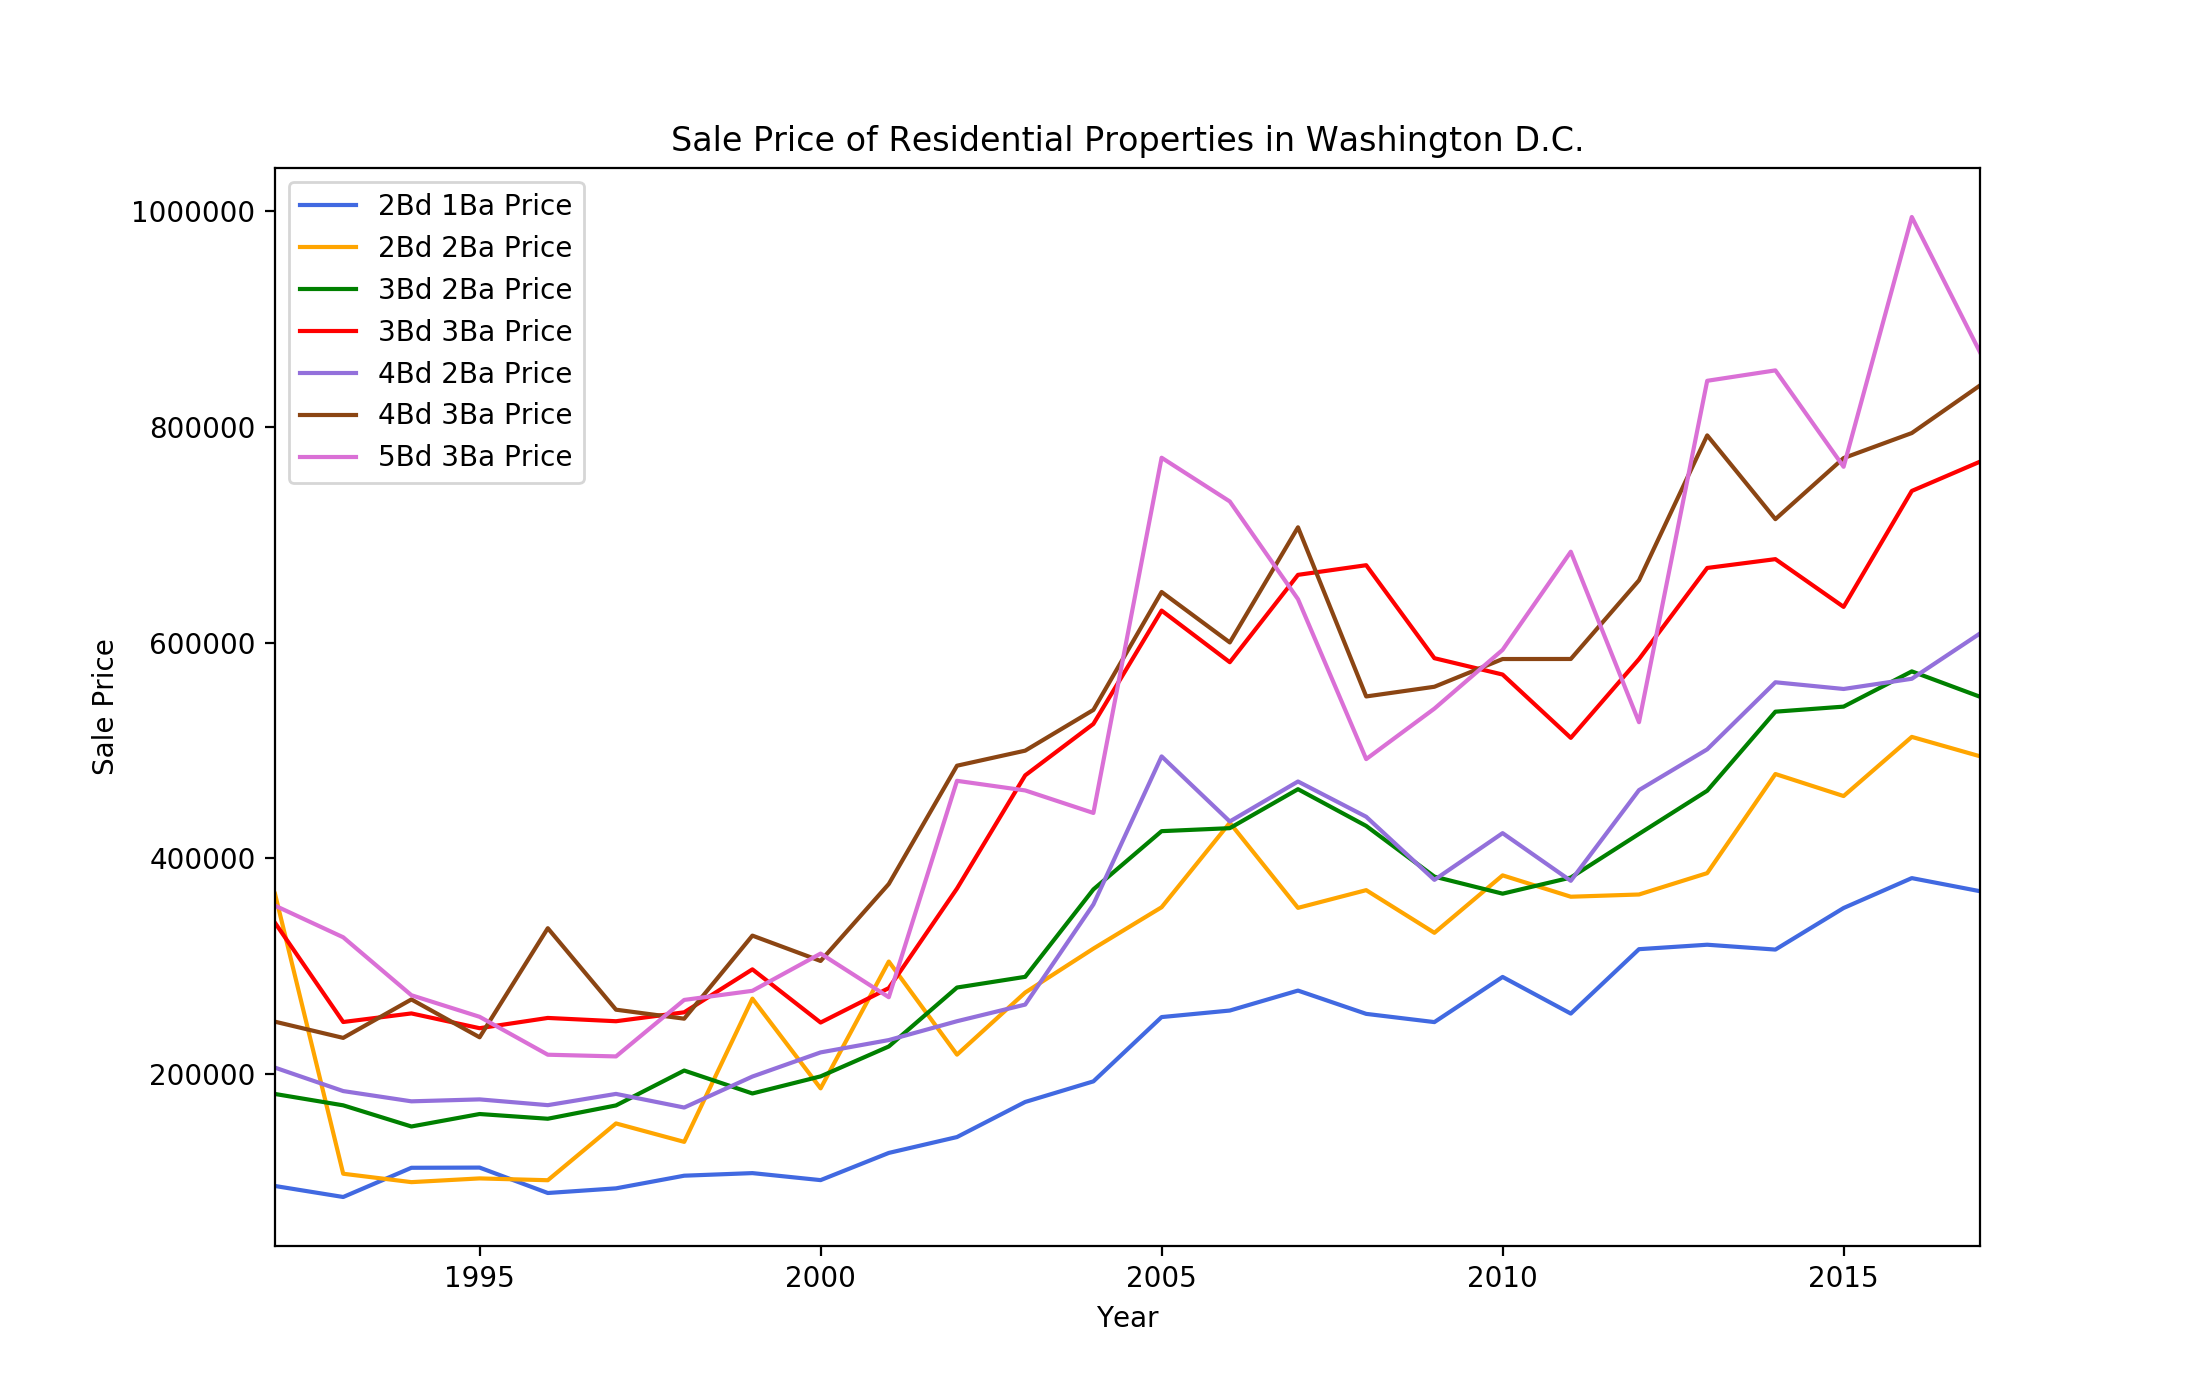

In [33]:
colors = ["royalblue", "orange", "green", "red", "mediumpurple", "saddlebrown", "orchid"]
bed_bath_merge_df.plot(xlim=(1992.0,2017.0), figsize=(11,7), colors = colors)
plt.title("Sale Price of Residential Properties in Washington D.C.")
plt.ylabel("Sale Price")
plt.xlabel("Year")
plt.savefig("Images/sale_price_properties_DC.png")

In [34]:
bed_bath_merge_df2 = bed_bath_merge_df.drop(bed_bath_merge_df.index[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24]])
bed_bath_merge_df2

,2Bd 1Ba Price,2Bd 2Ba Price,3Bd 2Ba Price,3Bd 3Ba Price,4Bd 2Ba Price,4Bd 3Ba Price,5Bd 3Ba Price
YEAR,,,,,,,
2007.0,277452.120805,354132.622951,464158.894180,662845.000000,471286.056338,706913.575000,640289.200
2017.0,369571.221739,494650.936585,549838.336756,767771.680851,608504.446927,838420.493243,869232.625


In [35]:
bed_bath_merge_df3 = bed_bath_merge_df2.diff()
bed_bath_merge_df3

,2Bd 1Ba Price,2Bd 2Ba Price,3Bd 2Ba Price,3Bd 3Ba Price,4Bd 2Ba Price,4Bd 3Ba Price,5Bd 3Ba Price
YEAR,,,,,,,
2007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017.0,92119.100934,140518.313635,85679.442576,104926.680851,137218.390589,131506.918243,228943.425


In [36]:
bed_bath_merge_df4 = bed_bath_merge_df3.drop(bed_bath_merge_df3.index[[0]])
bed_bath_merge_df4.index.name = 'Price Change (2017-2007)'

bed_bath_merge_df4

,2Bd 1Ba Price,2Bd 2Ba Price,3Bd 2Ba Price,3Bd 3Ba Price,4Bd 2Ba Price,4Bd 3Ba Price,5Bd 3Ba Price
Price Change (2017-2007),,,,,,,
2017.0,92119.100934,140518.313635,85679.442576,104926.680851,137218.390589,131506.918243,228943.425


<IPython.core.display.Javascript object>


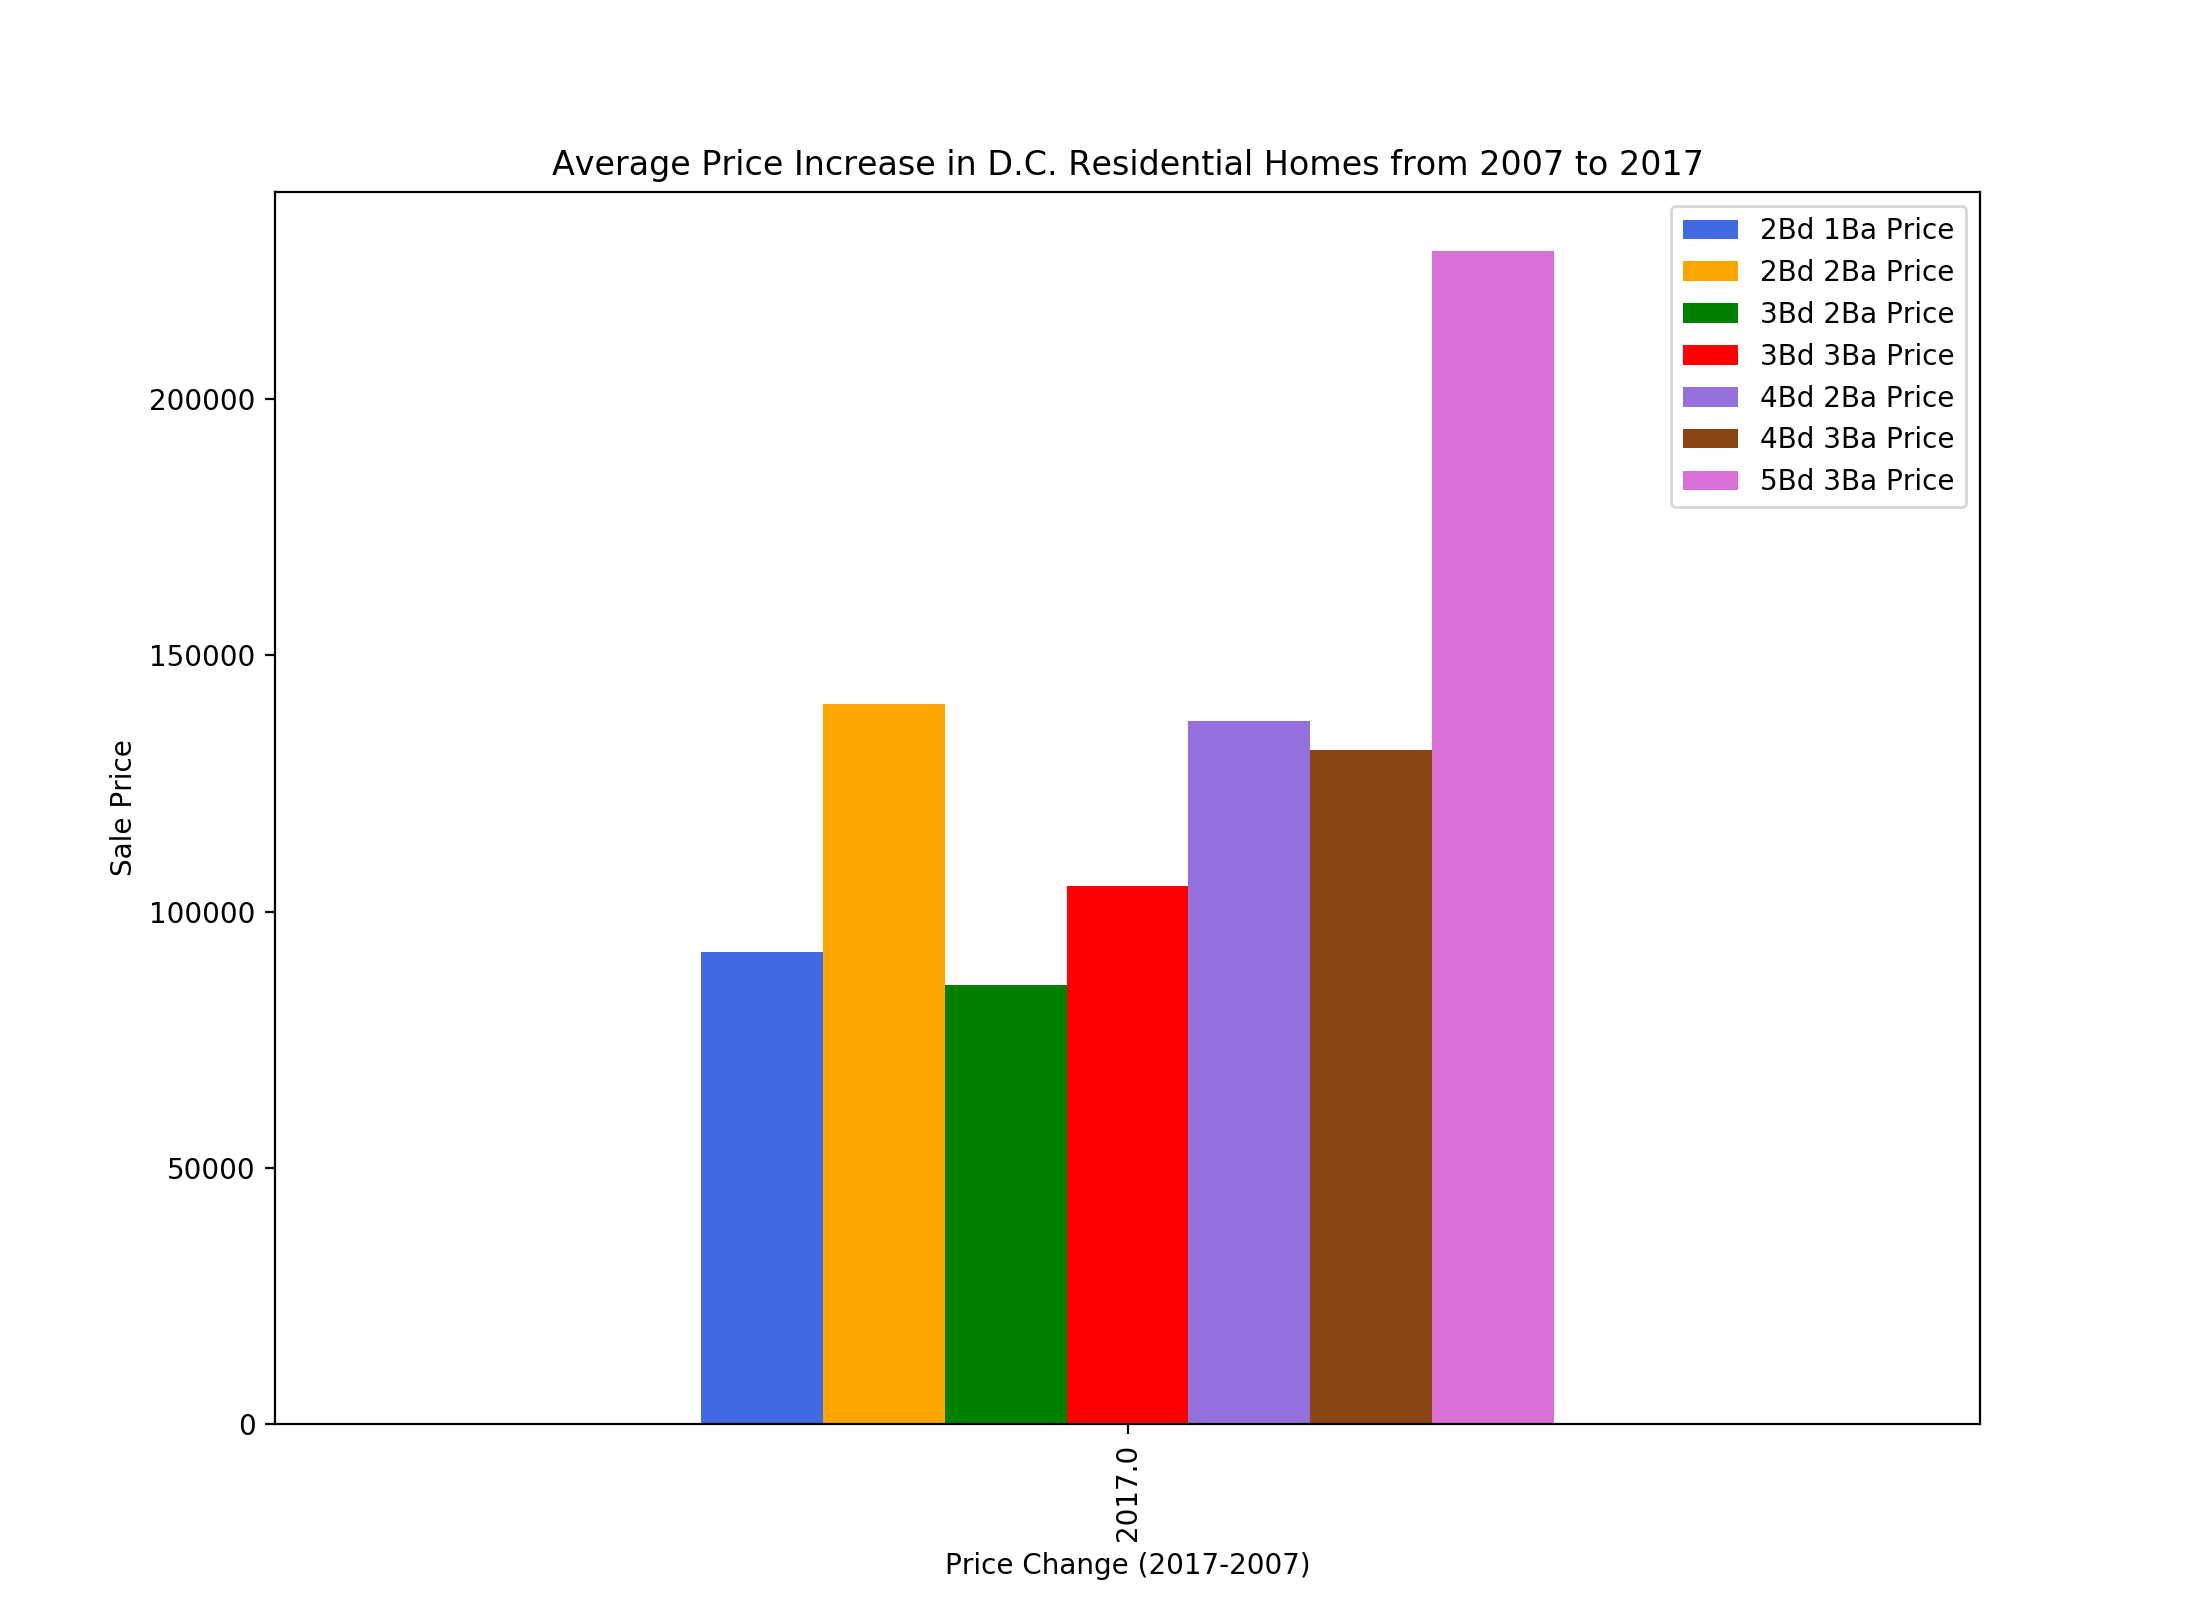

In [37]:
colors = ["royalblue", "orange", "green", "red", "mediumpurple", "saddlebrown", "orchid"]
bed_bath_merge_df4.plot(kind='bar', figsize=(11,8), colors = colors)
plt.title("Average Price Increase in D.C. Residential Homes from 2007 to 2017")
plt.ylabel("Sale Price")
plt.savefig("Images/avg_price_increase_lastdecade.png")